In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import pandas as pd
import numpy as np

In [29]:
train_data = pd.read_csv('Train.csv')

In [30]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
### Data validation
### Check for correct format of data. For instance, checking for range, datatype check, structured check, consistancy check, etc.

## Descriptive analysis

In [33]:
### Numerical features
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

In [34]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [35]:
discrete_feature = [feature for feature in numerical_features if len(train_data[feature].unique()) < 25]

In [36]:
discrete_feature

['Outlet_Establishment_Year']

In [37]:
continuous__feature = [feature for feature in numerical_features if feature not in discrete_feature]

In [38]:
continuous__feature

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [39]:
categorical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

In [40]:
categorical_feature

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [41]:
for feature in categorical_feature:
    print("Features is {} and categories are {}".format(feature, len(train_data[feature].unique())))

Features is Item_Identifier and categories are 1559
Features is Item_Fat_Content and categories are 5
Features is Item_Type and categories are 16
Features is Outlet_Identifier and categories are 10
Features is Outlet_Size and categories are 4
Features is Outlet_Location_Type and categories are 3
Features is Outlet_Type and categories are 4


In [16]:
## Mean
train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [17]:
## Median
train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].median()

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [18]:
## Mode
train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].mode()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,12.15,0.0,172.0422,1985,958.752


In [19]:
## Mode for categorical data

train_data[['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']].mode()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
## Std
train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].std()

Item_Weight                     4.643456
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [21]:
## Variance
train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].var()

Item_Weight                  2.156169e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [22]:
## Skew

train_data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']].skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

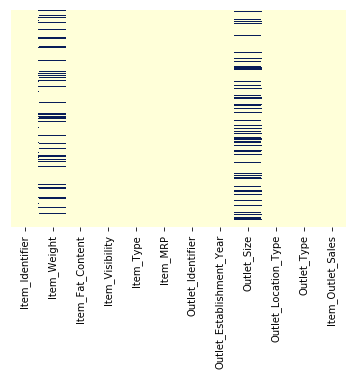

In [59]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [24]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
train_data.isnull().sum() * 100 / len(train_data)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [26]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode)

<AxesSubplot:>

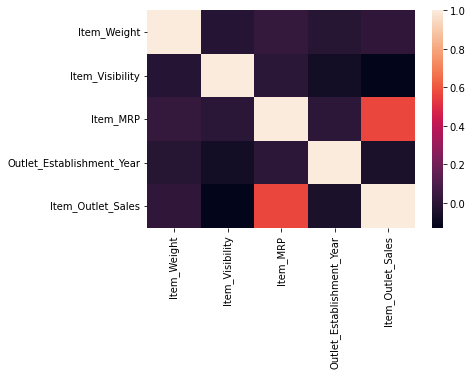

In [23]:
sns.heatmap(train_data.corr())

In [28]:
## Exploratory data analysis
## Univariate analysis

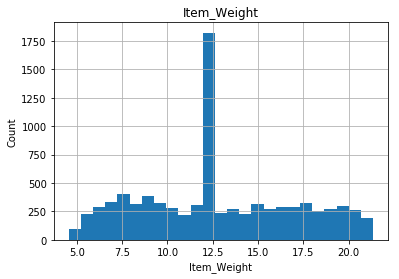

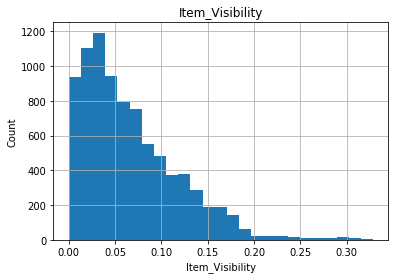

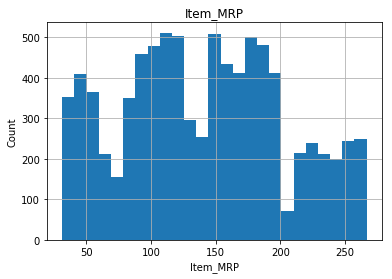

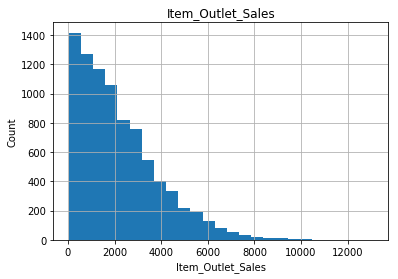

In [29]:
for feature in continuous__feature:
    dataset=train_data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [30]:
## Bivariate Analysis

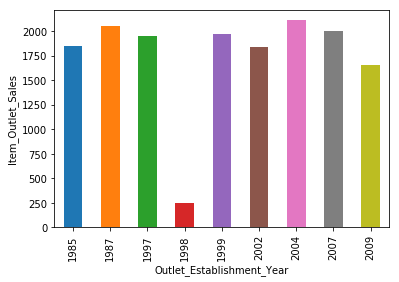

In [31]:
#Finding relationship between SalePrice and discrete features.
for feature in discrete_feature:
        dataset = train_data.copy()
        dataset.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.show()

In [ ]:
['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

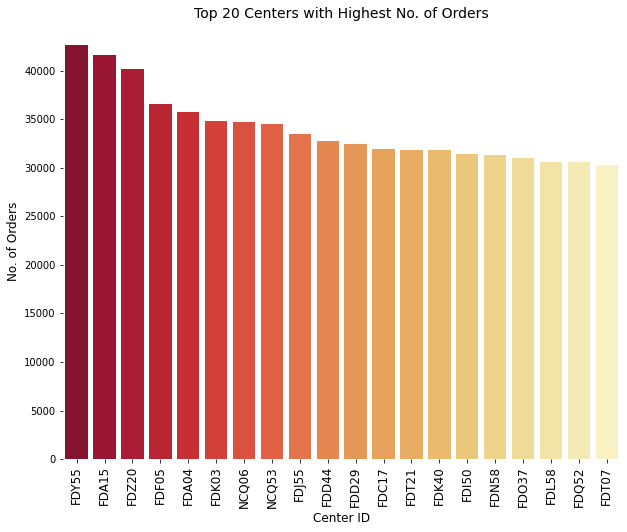

In [46]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Item_Identifier', data=train_data.groupby(['Item_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Item_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20)['Item_Identifier']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

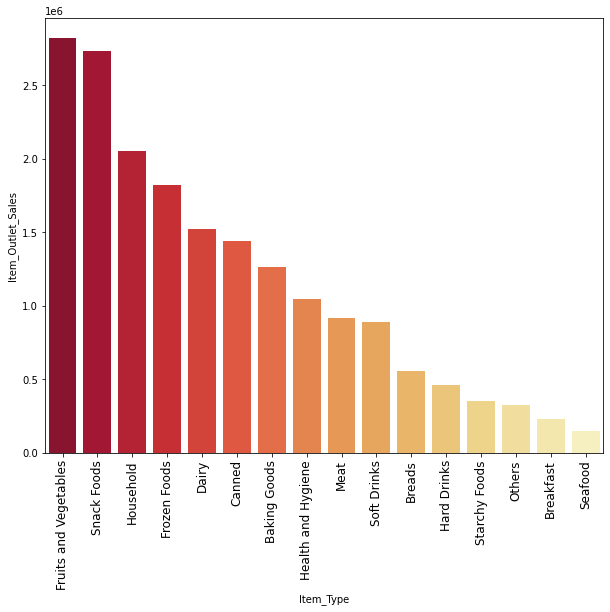

In [49]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Item_Type', data=train_data.groupby(['Item_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Item_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Item_Type']));

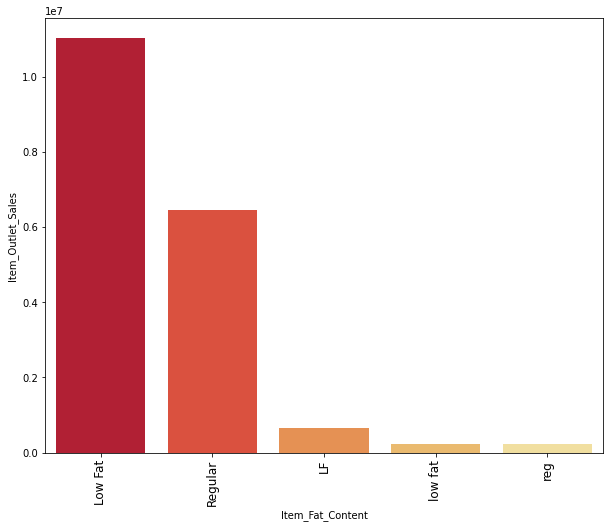

In [52]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Item_Fat_Content', data=train_data.groupby(['Item_Fat_Content']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Item_Fat_Content']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Item_Fat_Content']));

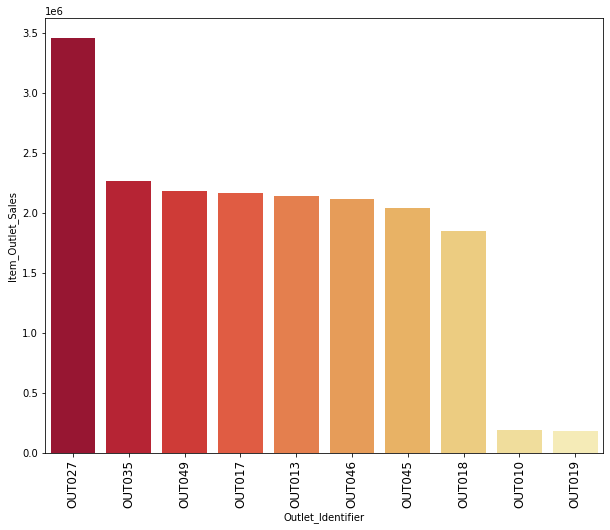

In [53]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Identifier', data=train_data.groupby(['Outlet_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Outlet_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Outlet_Identifier']));

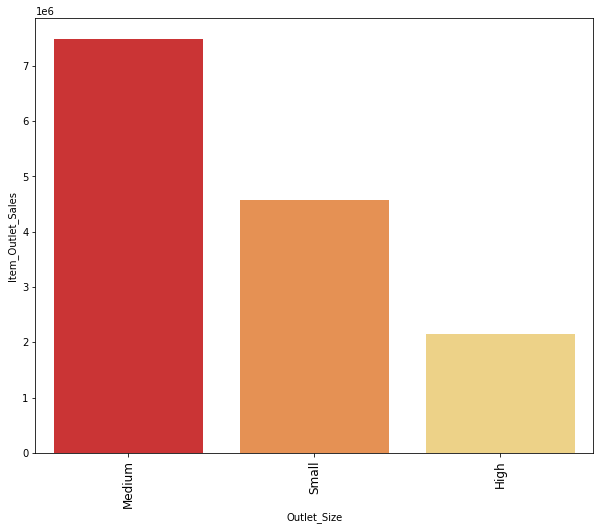

In [54]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Size', data=train_data.groupby(['Outlet_Size']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Outlet_Size']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Outlet_Size']));

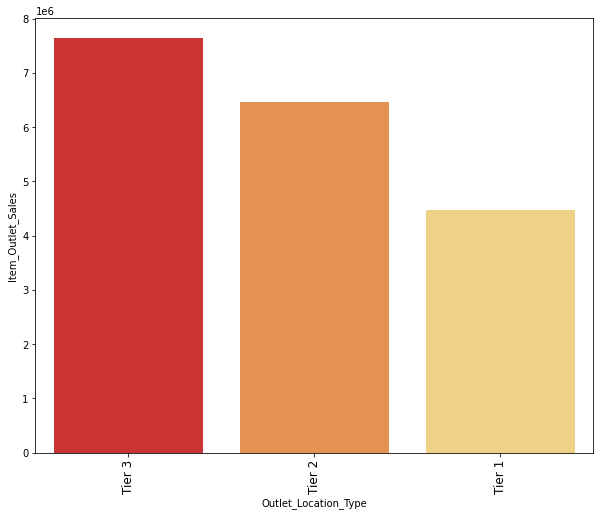

In [55]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Location_Type', data=train_data.groupby(['Outlet_Location_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Outlet_Location_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Outlet_Location_Type']));

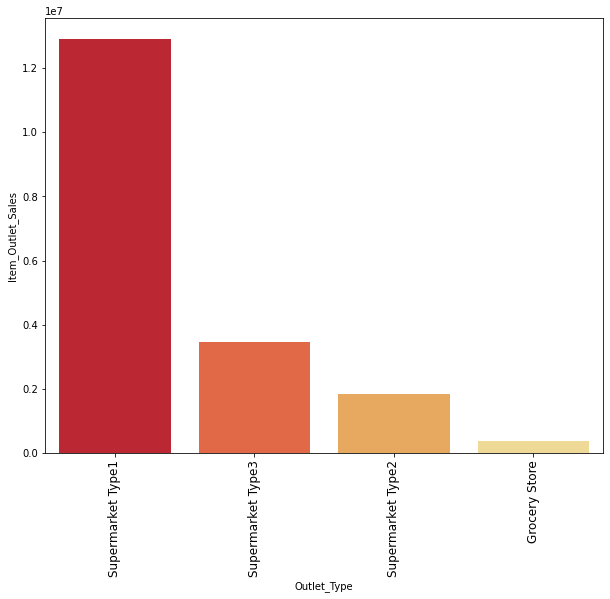

In [56]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Type', data=train_data.groupby(['Outlet_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Outlet_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index()['Outlet_Type']));

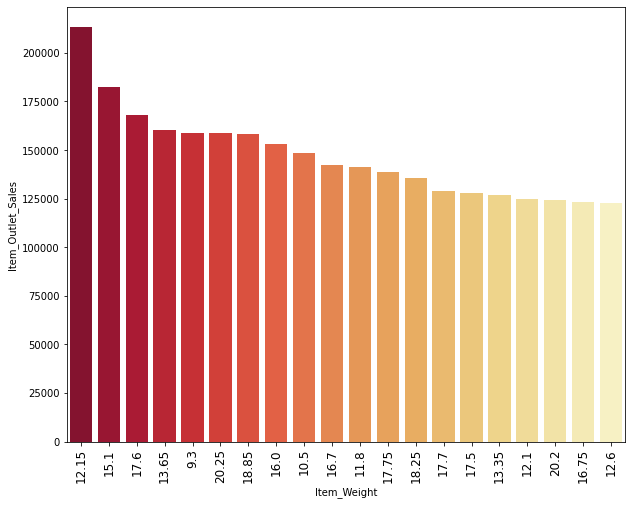

In [61]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Item_Outlet_Sales', x='Item_Weight', data=train_data.groupby(['Item_Weight']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train_data.groupby(['Item_Weight']).Item_Outlet_Sales.sum().sort_values(ascending=False).reset_index().head(20)['Item_Weight']));

In [24]:
### Handling missing values
#feature_with_na = train_data.isnull().sum()
feature_with_na = features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>1]

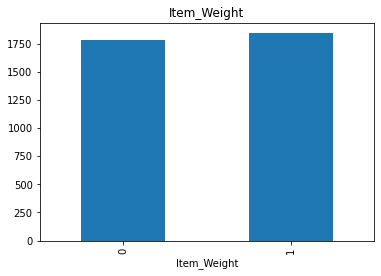

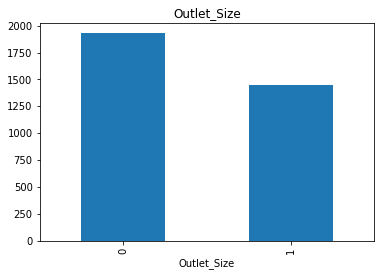

In [25]:
for feature in feature_with_na:
    dataset = train_data.copy()
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)
    dataset.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()